# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 658


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (url + "appid=" + weather_api_key + "&q=" + city + "&units=metric")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | palafrugell
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | hambantota
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | novyy urengoy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | talaya
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | ushuaia
Proc

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          612
Lat           612
Lng           612
Max Temp      612
Humidity      612
Cloudiness    612
Wind Speed    612
Country       612
Date          612
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,10.70,95,100,0.00,AU,1681242336
1,palafrugell,41.9174,3.1631,15.35,84,90,3.56,ES,1681242629
2,alofi,-19.0595,-169.9187,24.94,78,41,2.57,NU,1681242411
3,punta arenas,-53.1500,-70.9167,8.06,53,40,8.23,CL,1681242354
4,nikolskoye,59.7035,30.7861,6.94,84,100,1.78,RU,1681242364


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,10.70,95,100,0.00,AU,1681242336
1,palafrugell,41.9174,3.1631,15.35,84,90,3.56,ES,1681242629
2,alofi,-19.0595,-169.9187,24.94,78,41,2.57,NU,1681242411
3,punta arenas,-53.1500,-70.9167,8.06,53,40,8.23,CL,1681242354
4,nikolskoye,59.7035,30.7861,6.94,84,100,1.78,RU,1681242364


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

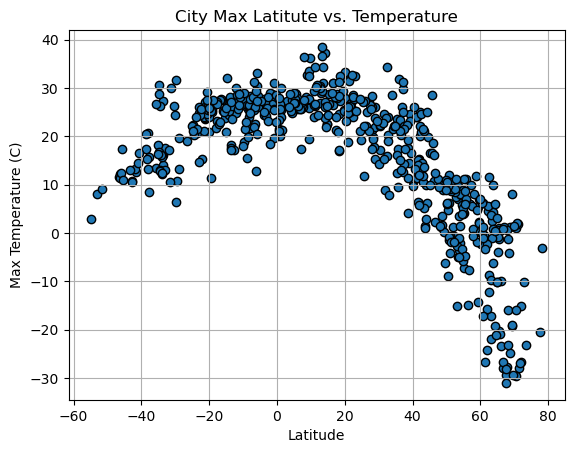

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitute vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

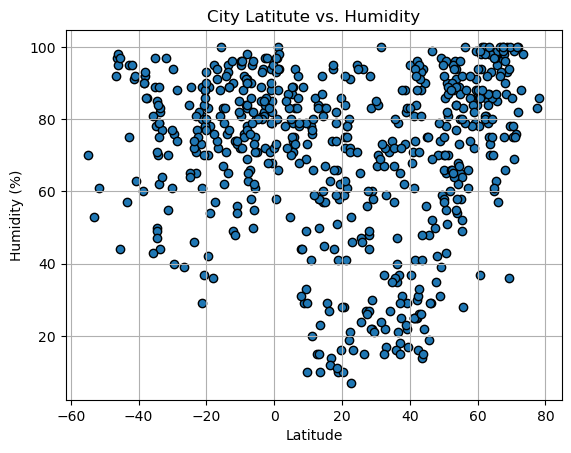

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitute vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

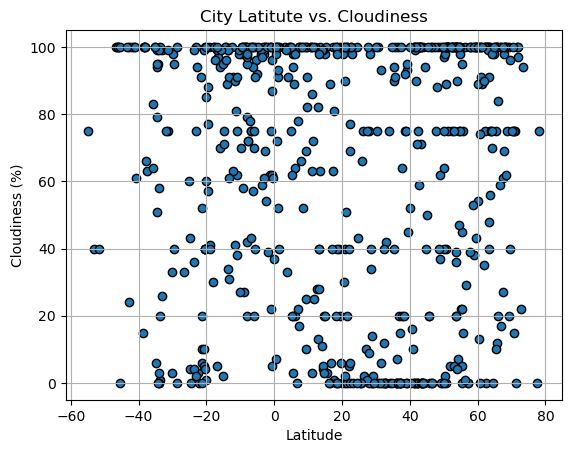

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitute vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

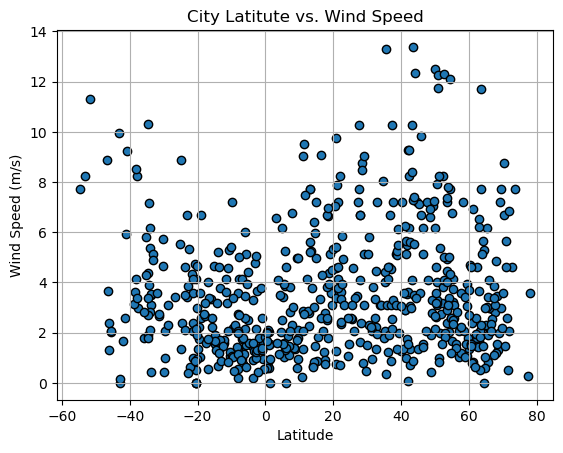

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitute vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def calculate_line(x_values, y_values, y_label, location):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(location), fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    return print("The r-value is: " + str(rvalue))
    return plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,palafrugell,41.9174,3.1631,15.35,84,90,3.56,ES,1681242629
4,nikolskoye,59.7035,30.7861,6.94,84,100,1.78,RU,1681242364
8,lata,40.1629,-8.3327,10.75,95,52,1.29,PT,1681242407
9,hambantota,6.1241,81.1185,25.58,83,64,4.61,LK,1681242631
10,vardo,70.3705,31.1107,0.99,75,75,6.69,NO,1681242370


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,10.70,95,100,0.00,AU,1681242336
2,alofi,-19.0595,-169.9187,24.94,78,41,2.57,NU,1681242411
3,punta arenas,-53.1500,-70.9167,8.06,53,40,8.23,CL,1681242354
5,namatanai,-3.6667,152.4333,26.01,81,98,0.92,PG,1681242454
6,new norfolk,-42.7826,147.0587,10.50,75,24,0.15,AU,1681242359


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8458773482541602


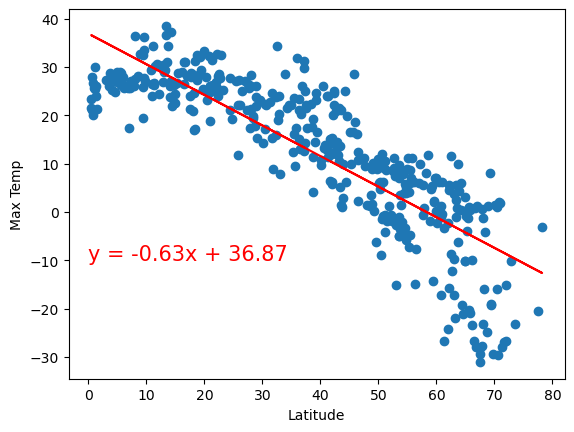

In [37]:
# Linear regression on Northern Hemisphere
calculate_line(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (0,-10))


The r-value is: 0.6935124109388876


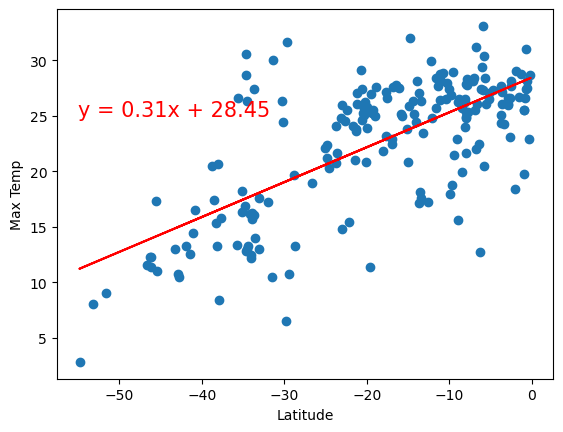

In [38]:
# Linear regression on Southern Hemisphere
calculate_line(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55,25))

**Discussion about the linear relationship:** There seems to be a pretty strong linear relationship between latitude and max temperature in both the northern and southern hemisphere, with the northern hemisphere having a slightly stronger correlation. In both hemispheres, as you get closer to a latitude of zero, the max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2824750171643271


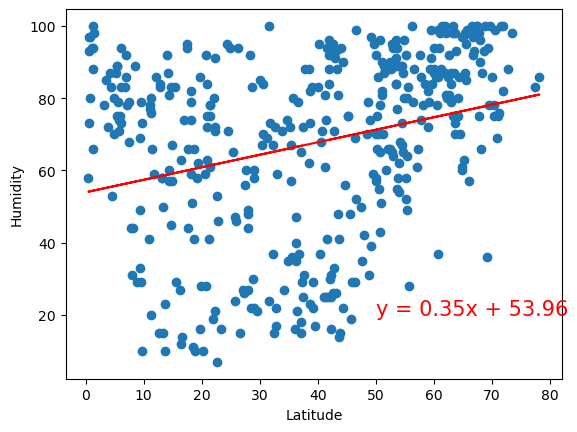

In [39]:
# Northern Hemisphere
calculate_line(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (50,20))

The r-value is: 0.11387077907700605


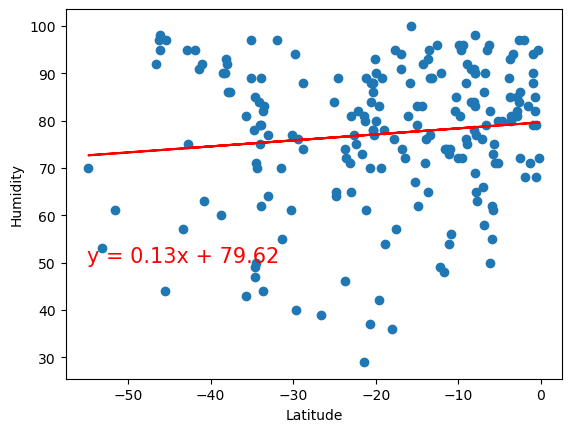

In [40]:
# Southern Hemisphere
calculate_line(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55,50))

**Discussion about the linear relationship:** There does not seem to be as strong of a correlation between latitude and humidity, as compared to latitude and max temperature. In the southern hemisphere, there is a very low r-value, indicating minimal correlation between the two variables in this sample. The northern hemisphere has a slightly higher r-value, but there still does not appear to be a strong correlation between the two.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11576171280835468


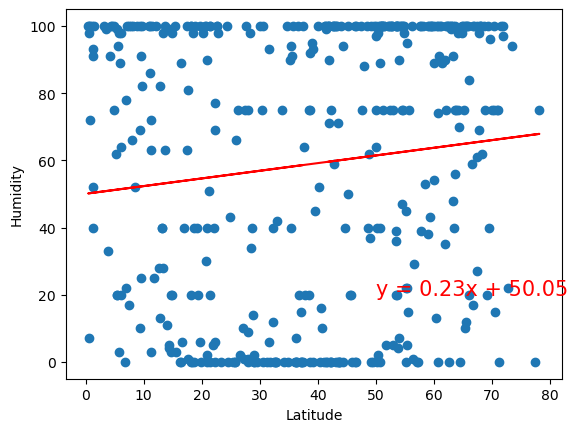

In [41]:
# Northern Hemisphere
calculate_line(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Humidity", (50,20))

The r-value is: 0.14259207834528487


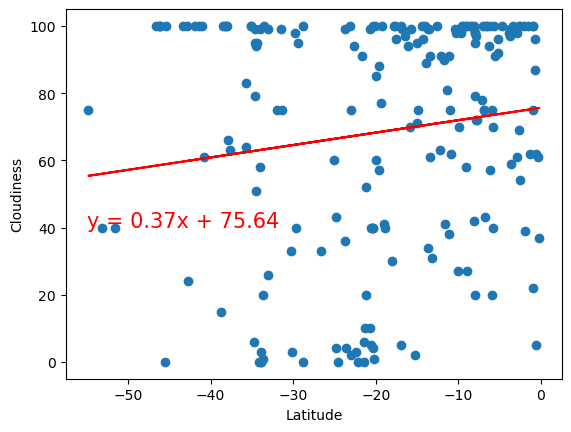

In [42]:
# Southern Hemisphere
calculate_line(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55,40))

**Discussion about the linear relationship:** Based on this sample, there does not seem to be a strong correlation between latitude and cloudiness in either the northern or southern hemisphere. Both charts have a low positive r-value, indicating minimal correlation between the two variables. Based on review of the charts, this seems reasonable because the points are very spread out on both charts. There is also a difference in the y-intercept between the two hemispheres, with the northern hemisphere's calculated at approximately 50% cloudiness and the southern's at approxiamtely 76% cloudiness at zero latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05285866331052554


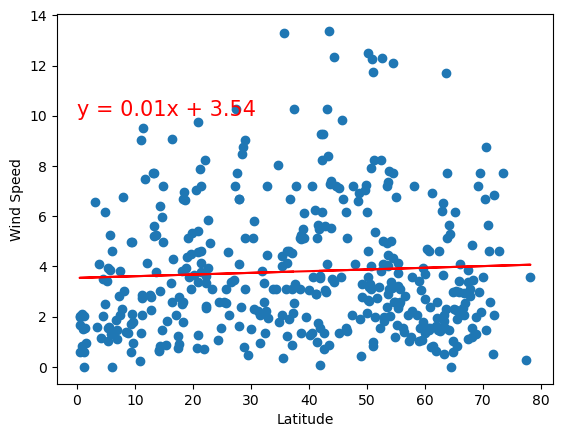

In [43]:
# Northern Hemisphere
calculate_line(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (0,10))

The r-value is: -0.4149183385545569


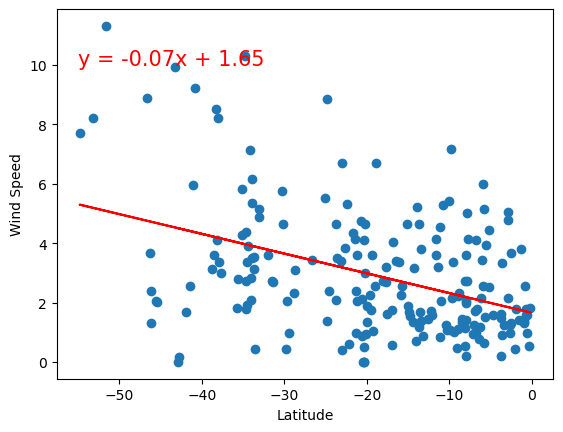

In [44]:
# Southern Hemisphere
calculate_line(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-55,10))

**Discussion about the linear relationship:** There is almost no correlation between latitude and wind speed in the northern hemisphere.  The r-value in this chart is less than 0.1, indicating minimal relationship between the two variables. However, in the southern hemisphere, there appears to be a stronger negative correlation with the r-value approximately -0.4. This means that in the southern hemisphere, as the latitude gets closer to 0, the wind speed decreases. There do seem to be some outliers though, so we may need to test another sample or a larger dataset to determine if this difference in the northern vs. southern hemisphere is accurate. 